In [75]:
## Extracting Features

## 1. Invert the image and then convert it to a binary image 
# IMPORT data by batches (by character in the image (0,1,2,3...etc))

# preprocess with parallel computing

# check Pillow version number
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from random import randint
import matplotlib.pyplot as plt



# NumPy uses asarra() to convert PIL images into NumPy arrays

## 2. to find contours, use 'findContour' function. For features, obtain bounding rectangle of contour
## using 'boudningRect' function

# 3. calculate the area of the bounding rectange of each contour and select the rectangle with max area

# 4. resize the max area bounding rectangle to 28 by 28. Reshape to 784 x 1
## now give corresponding label to each image (0-9 images, same label as their digit)
## for - , assign label 10, for + 11, and for * 12



In [5]:
# Creates batches of tensor image data with real-time data augmentation
# holds 20% of dataset for validation
train_datagen = ImageDataGenerator(rescale = 1./255,    
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = .2)

# Define path to directory where my data is
path = '/Users/paulscemama/AutomatingArith/train'

# get batches of augmented data for training
train = train_datagen.flow_from_directory(path,
    target_size = (64,64),
    color_mode = "grayscale",
    classes = ['-','+','=','0','1','2','3','4','5','6','7','8','9','*'],
    class_mode = 'categorical',
    subset = 'training',
    seed = 121)

val = train_datagen.flow_from_directory(path,
    target_size = (64,64),
    color_mode = 'grayscale',
    classes = ['-','+','=','0','1','2','3','4','5','6','7','8','9','*'],
    class_mode = 'categorical',
    subset = 'validation',
    seed = 121
)




Found 133182 images belonging to 14 classes.
Found 33288 images belonging to 14 classes.


In [3]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPooling2D(pool_size = (2,2)))    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(14, activation = 'softmax'))

    # compile 
    optimizer = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [4]:
classify = prepare_model()


In [5]:
classify.fit(train,
                    validation_data = val,
                    steps_per_epoch = train.n//train.batch_size,
                    validation_steps = val.n//val.batch_size,
                    epochs=5)

Epoch 1/5
4161/4161 [==============================] - 325s 78ms/step - loss: 0.7226 - accuracy: 0.7751 - val_loss: 0.2620 - val_accuracy: 0.9207
Epoch 2/5
4161/4161 [==============================] - 317s 76ms/step - loss: 0.2274 - accuracy: 0.9324 - val_loss: 0.1658 - val_accuracy: 0.9508
Epoch 3/5
4161/4161 [==============================] - 325s 78ms/step - loss: 0.1644 - accuracy: 0.9518 - val_loss: 0.1327 - val_accuracy: 0.9610
Epoch 4/5
4161/4161 [==============================] - 304s 73ms/step - loss: 0.1338 - accuracy: 0.9601 - val_loss: 0.1517 - val_accuracy: 0.9545
Epoch 5/5
4161/4161 [==============================] - 290s 70ms/step - loss: 0.1307 - accuracy: 0.9606 - val_loss: 0.1163 - val_accuracy: 0.9635


In [6]:
from keras.models import model_from_json

In [8]:
# Evaluate model
score = classify.evaluate(val)


1041/1041 [==============================] - 52s 49ms/step - loss: 0.1190 - accuracy: 0.9640


In [9]:
print('Val Accuracy', score[1])

Test Accuracy 0.9639509916305542


In [10]:
# save weights and model

# Serialize model to json
classify_json = classify.to_json()
with open('classify_json','w') as json_file:
    json_file.write(classify_json)

# Serialize weights to HDF5
classify.save_weights('classify_weights.h5')

In [14]:
# Ensure it worked by loading in the model and testing its performance
# load model
json_file = open('classify_json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_classify = model_from_json(loaded_model_json)
# load weights
loaded_classify.load_weights('classify_weights.h5')

# evaluate model
loaded_classify.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.01, momentum = 0.9), metrics = ['accuracy'])
loaded_score = loaded_classify.evaluate(val, verbose = 0)
print('Accuracy', loaded_score[1])

Accuracy 0.9640411138534546


## Localization Model

Need to first create a new dataset

In [50]:
np.random.seed(123)

def create_random_sample(symbol, percentage):
        path = '/Users/paulscemama/AutomatingArith/train'
        if symbol == 'times':
                filenames = [f for f in os.listdir(path + '/' + symbol)]
        else:
                filenames = [f for f in os.listdir(path + '/' + symbol) if f[0] == symbol]
        random_samp = np.random.choice(filenames, int(len(filenames)* percentage))
        return random_samp

In [53]:
# create samples

random_minus = create_random_sample('-', 0.1)
random_plus = create_random_sample('+',0.1)
random_equals = create_random_sample('=',0.2)
random_zeros = create_random_sample('0',0.25)
random_ones = create_random_sample('1', 0.25)
random_twos = create_random_sample('2', 0.25)
random_threes = create_random_sample('3', 0.25)
random_fours = create_random_sample('4', 0.25)
random_fives = create_random_sample('5', 0.25)
random_sixes = create_random_sample('6', 0.25)
random_sevens = create_random_sample('7', 0.25)
random_eights = create_random_sample('8', 0.25)
random_nines = create_random_sample('9', 0.25)
random_times = create_random_sample('times', 0.1)

In [71]:
from PIL import Image

minus = Image.open(path + '/-/' + random_minus[randint(0,len(random_minus))])
plus = Image.open(path + '/+/' + random_plus[randint(0,len(random_plus))])
equals = Image.open(path + '/=/' + random_equals[randint(0,len(random_equals))])
zero = Image.open(path + '/0/' + random_zeros[randint(0,len(random_zeros))])
one = Image.open(path + '/1/' + random_ones[randint(0,len(random_ones))])
two = Image.open(path + '/2/' + random_twos[randint(0,len(random_twos))])
three = Image.open(path + '/3/' + random_threes[randint(0,len(random_threes))])
four = Image.open(path + '/4/' + random_fours[randint(0,len(random_fours))])
five = Image.open(path + '/5/' + random_fives[randint(0,len(random_fives))])
six = Image.open(path + '/6/' + random_sixes[randint(0,len(random_sixes))])
seven = Image.open(path + '/7/' + random_sevens[randint(0,len(random_sevens))])
eight = Image.open(path + '/8/' + random_eights[randint(0,len(random_eights))])
nine = Image.open(path + '/9/' + random_nines[randint(0,len(random_nines))])
times = Image.open(path + '/times/' + random_times[randint(0,len(random_times))])

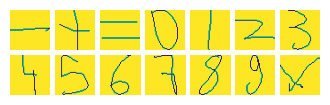

In [94]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(4.,4.))
grid = ImageGrid(fig, 111,
            nrows_ncols = (2,7),
            axes_pad = 0.05)

for ax, im in zip(grid, [minus,plus,equals,zero,one,two,three,four,five,six,seven,eight,nine,times]):
    ax.set_axis_off()
    ax.imshow(im)

plt.show()

